# Comparing Models

This notebook will attempt to compare KNN Regression and OLS Regression. We'll use the continous components of a Credit Card dataset to predict a credit balance

In [61]:
# dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


color_list = ['#cc615c', '#6965a7', '#f1bdbf']
sns.set_palette(color_list)

%matplotlib inline

In [2]:
# dataset
df = pd.read_csv("data/credit/Credit.csv")

In [3]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
# convert income to its real value, not in terms of thousands
df["Income"] = df["Income"] * 1000

In [5]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
3,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
4,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Feature Selection

Here, we'll remove the categorical features as KNN cannot handle categorical variables. To compare the models, we'll use the same features.

In [6]:
clean_df = df.drop(columns=[
    "Gender",
    "Student",
    "Married",
    "Ethnicity"
])

In [7]:
clean_df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14891.0,3606,283,2,34,11,333
1,106025.0,6645,483,3,82,15,903
2,104593.0,7075,514,4,71,11,580
3,148924.0,9504,681,3,36,11,964
4,55882.0,4897,357,2,68,16,331


In [8]:
# now that we're dealing with only continous data, let's create our features & target variables
# our target is Balance, features are everything else

features = clean_df.drop(columns=["Balance"])
target = clean_df["Balance"]

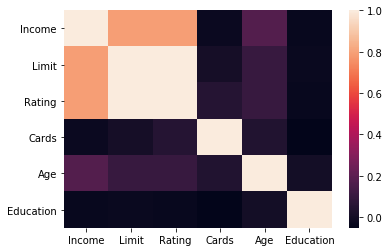

In [9]:
# find the correlation between the existing features
sns.heatmap(features.corr())

In [10]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=20)

In [11]:
# create the KNN model
knn = KNeighborsRegressor(n_neighbors=7, weights="distance")

knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='distance')

In [12]:
# create the Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# validate the regression models against each other
knn_score = cross_val_score(knn, X_test, y_test, cv=5)
lm_score = cross_val_score(lm, X_test, y_test, cv=5)

In [14]:
print("KNN had accuracy score of: %0.2f (+/- %0.4f)" % (knn_score.mean(), knn_score.std() * 2))
print("Linear Regression had accuracy score of: %0.2f (+/- %0.4f)" % (lm_score.mean(), lm_score.std() * 2))

KNN had accuracy score of: 0.46 (+/- 0.2114)
Linear Regression had accuracy score of: 0.85 (+/- 0.0612)


Hmmm. Seems like the KNN lost that one. We might be able to aide our accuracy by normalizing the values in the KNN. This is important due to the distance measurement. For this, let's use z-score normalization.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler().fit(clean_df)

In [29]:
scaled_values = scaler.fit_transform(clean_df)

scaled_df = pd.DataFrame(scaled_values, columns=clean_df.columns)

In [30]:
scaled_df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,-0.407277
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,0.834056
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0.130634
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0.966900
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,-0.411633


In [31]:
# split into features and target
features = scaled_df.drop(columns=["Balance"])
target = scaled_df["Balance"]

In [32]:
# split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=20)

In [57]:
knn = KNeighborsRegressor(n_neighbors=10, weights="distance")
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [58]:
# validate the two models again
# validate the regression models against each other
knn_score = cross_val_score(knn, X_test, y_test, cv=5)
lm_score = cross_val_score(lm, X_test, y_test, cv=5)

In [59]:
print("KNN had accuracy score of: %0.2f (+/- %0.4f)" % (knn_score.mean(), knn_score.std() * 2))
print("Linear Regression had accuracy score of: %0.2f (+/- %0.4f)" % (lm_score.mean(), lm_score.std() * 2))

KNN had accuracy score of: 0.66 (+/- 0.1043)
Linear Regression had accuracy score of: 0.85 (+/- 0.0612)


In [67]:
knn_pred = knn.predict(X_test)

a = knn.score(X_test, y_test)

print("Accuracy is {}".format(a))

Accuracy is 0.7784982821134375


### Conclusion

The KNN model performed much worse with a much higher variance than the Linear Model. One reason could be that the KNN did not have enough data points per features to work with. The whole dataset was only 400 datapoints. Also, the parametric approach used by linear regression could perform better because there probably is an underlying linear relationship between these variables